# Load and Print all the accuracies of the 10 runs 10-fold cross-validation for nbc versus aode on each dataset

In [8]:
ClassID = readdlm("Data/ClassifierID.dat", ',')
ClassNames = readdlm("Data/ClassifierNames.dat", ',')
DatasetID = readdlm("Data/DatasetID.dat", ',');
DatasetNames = readdlm("Data/DatasetNames.dat", ',');
Percent_correct = readdlm("Data/Percent_correct.dat", ',');

i=1 #nbc
j=2 #aode
println("Accuracies for ", ClassNames[i,1], "(first row) and ", ClassNames[j,1], "(second row) on 10 runs of 10-fold cross-validation")
println()
println()

indi=find(x->x==i,ClassID)
indj=find(x->x==j,ClassID)
for d=1:Int32(maximum(DatasetID))
    indd=find(x->x==d,DatasetID)
    indid=intersect(indi,indd)
    indjd=intersect(indj,indd)
    acci=Percent_correct[indid]
    acci=round(acci,2)
    accj=Percent_correct[indjd]
    accj=round(accj,2)
    #Latex Formatted
    println("$(DatasetNames[d]) & $(acci[1])  & $(acci[2])  & $(acci[3])  & $(acci[4]) & \\dots & $(acci[end-1]) & $(acci[end])\\\\")
    println("$(DatasetNames[d]) & $(accj[1])  & $(accj[2])  & $(accj[3])  & $(accj[4]) & \\dots & $(accj[end-1]) & $(accj[end])\\\\")
    if d==2
    df= convert(DataFrame, acci')
        writetable("nbc_audiology.csv", df )
    df=convert(DataFrame, accj')
    writetable("aode_audiology.csv", df )
    break
    end
end


Accuracies for nbc(first row) and aode(second row) on 10 runs of 10-fold cross-validation


anneal & 94.44  & 98.89  & 94.44  & 98.89 & \dots & 94.38 & 97.75\\
anneal & 96.67  & 100.0  & 96.67  & 100.0 & \dots & 96.63 & 97.75\\
audiology & 73.91  & 69.56  & 73.91  & 60.87 & \dots & 72.73 & 59.09\\
audiology & 73.91  & 69.56  & 78.26  & 60.87 & \dots & 72.73 & 59.09\\


# Hereafter we compute the $p$-values dataset-by-dataset by applying the frequentist correlated t-test

In [2]:
using Distributions
using DataFrames
include("Tests/ttest_correlated.jl")

#correlation for 10 runs 10 folds cross-validation
rho=1/10

#Classifiers
i=1 #nbc
j=2 #aode
println("two-sided p-values for ", ClassNames[i,1], " vs. ", ClassNames[j,1])
println()

indi=find(x->x==i,ClassID)
indj=find(x->x==j,ClassID)
pvalue=Float64[]
for d=1:Int32(maximum(DatasetID))
    indd=find(x->x==d,DatasetID)
    indid=intersect(indi,indd)
    indjd=intersect(indj,indd)
    acci=Percent_correct[indid]/100
    accj=Percent_correct[indjd]/100
    #return p-value and confidence interval
    p,ci=ttest_correlated(acci-accj,0,rho,0,0.05)
    push!(pvalue,p)   
    if mod(d,3)==0
        # Latex Formatted
        @printf "%s & %1.3f & %s & %1.3f & %s & %1.3f \\\\\n" DatasetNames[d-2] pvalue[d-2] DatasetNames[d-1] pvalue[d-1] DatasetNames[d] pvalue[d]   
    end
end


 



LoadError: LoadError: UndefVarError: ClassNames not defined
while loading In[2], in expression starting on line 11

# Piechart of the percentage of comparisons that are significant and non-significant

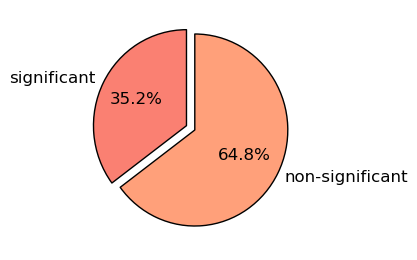

In [18]:
using PyPlot

res=find(x->x<0.05,pvalue)
labels = ["significant", "non-significant"]


colors = ["salmon","lightsalmon"]
sizes = NaN*zeros(2)
explode = zeros(length(sizes))
explode[1] = 0.1
sizes= [length(res)/length(pvalue)*100, (1-length(res)/length(pvalue))*100 ]

fig = figure("pyplot_piechart",figsize=(3,3))
    ax = fig[:add_subplot](1,1,1)
p,text,autotext=ax[:pie](sizes,
        labels=labels,
        shadow=false,
        startangle=90,
         colors=colors,
        explode=explode,
autopct="%1.1f%%")


io=open("Plots/piechart.pdf","w") 
writemime(io, "application/pdf", fig)

